In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("HPI.csv")

In [3]:
df=df.drop(["Id"],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotArea       1460 non-null   int64  
 3   LotConfig     1460 non-null   object 
 4   BldgType      1460 non-null   object 
 5   OverallCond   1460 non-null   int64  
 6   YearBuilt     1460 non-null   int64  
 7   YearRemodAdd  1460 non-null   int64  
 8   Exterior1st   1460 non-null   object 
 9   BsmtFinSF2    1460 non-null   int64  
 10  TotalBsmtSF   1460 non-null   int64  
 11  SalePrice     1460 non-null   float64
dtypes: float64(1), int64(7), object(4)
memory usage: 137.0+ KB


In [5]:
df=df.join(pd.get_dummies(df["MSZoning"])).drop(["MSZoning"],axis=1)
df=df.join(pd.get_dummies(df["LotConfig"])).drop(["LotConfig"],axis=1)
df=df.join(pd.get_dummies(df["BldgType"])).drop(["BldgType"],axis=1)
df=df.join(pd.get_dummies(df["Exterior1st"])).drop(["Exterior1st"],axis=1)

In [6]:
df.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,C (all),FV,...,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing
0,60,8450,5,2003,2003,0,856,208500.0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,20,9600,8,1976,1976,0,1262,181500.0,False,False,...,False,False,False,True,False,False,False,False,False,False
2,60,11250,5,2001,2002,0,920,223500.0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,70,9550,5,1915,1970,0,756,140000.0,False,False,...,False,False,False,False,False,False,False,False,True,False
4,60,14260,5,2000,2000,0,1145,250000.0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X=df.drop(["SalePrice"],axis=1)
y=df["SalePrice"]

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [10]:
train=X_train.join(y_train)
test=X_test.join(y_test)

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': 'SalePrice'}>, <Axes: >]], dtype=object)

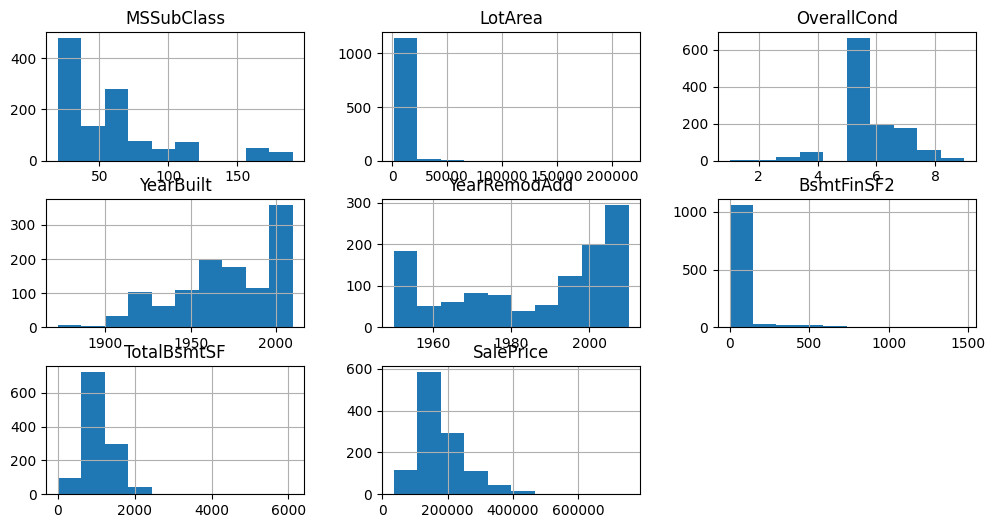

In [11]:
train.hist(figsize=(12,6))

In [12]:
import seaborn as sns

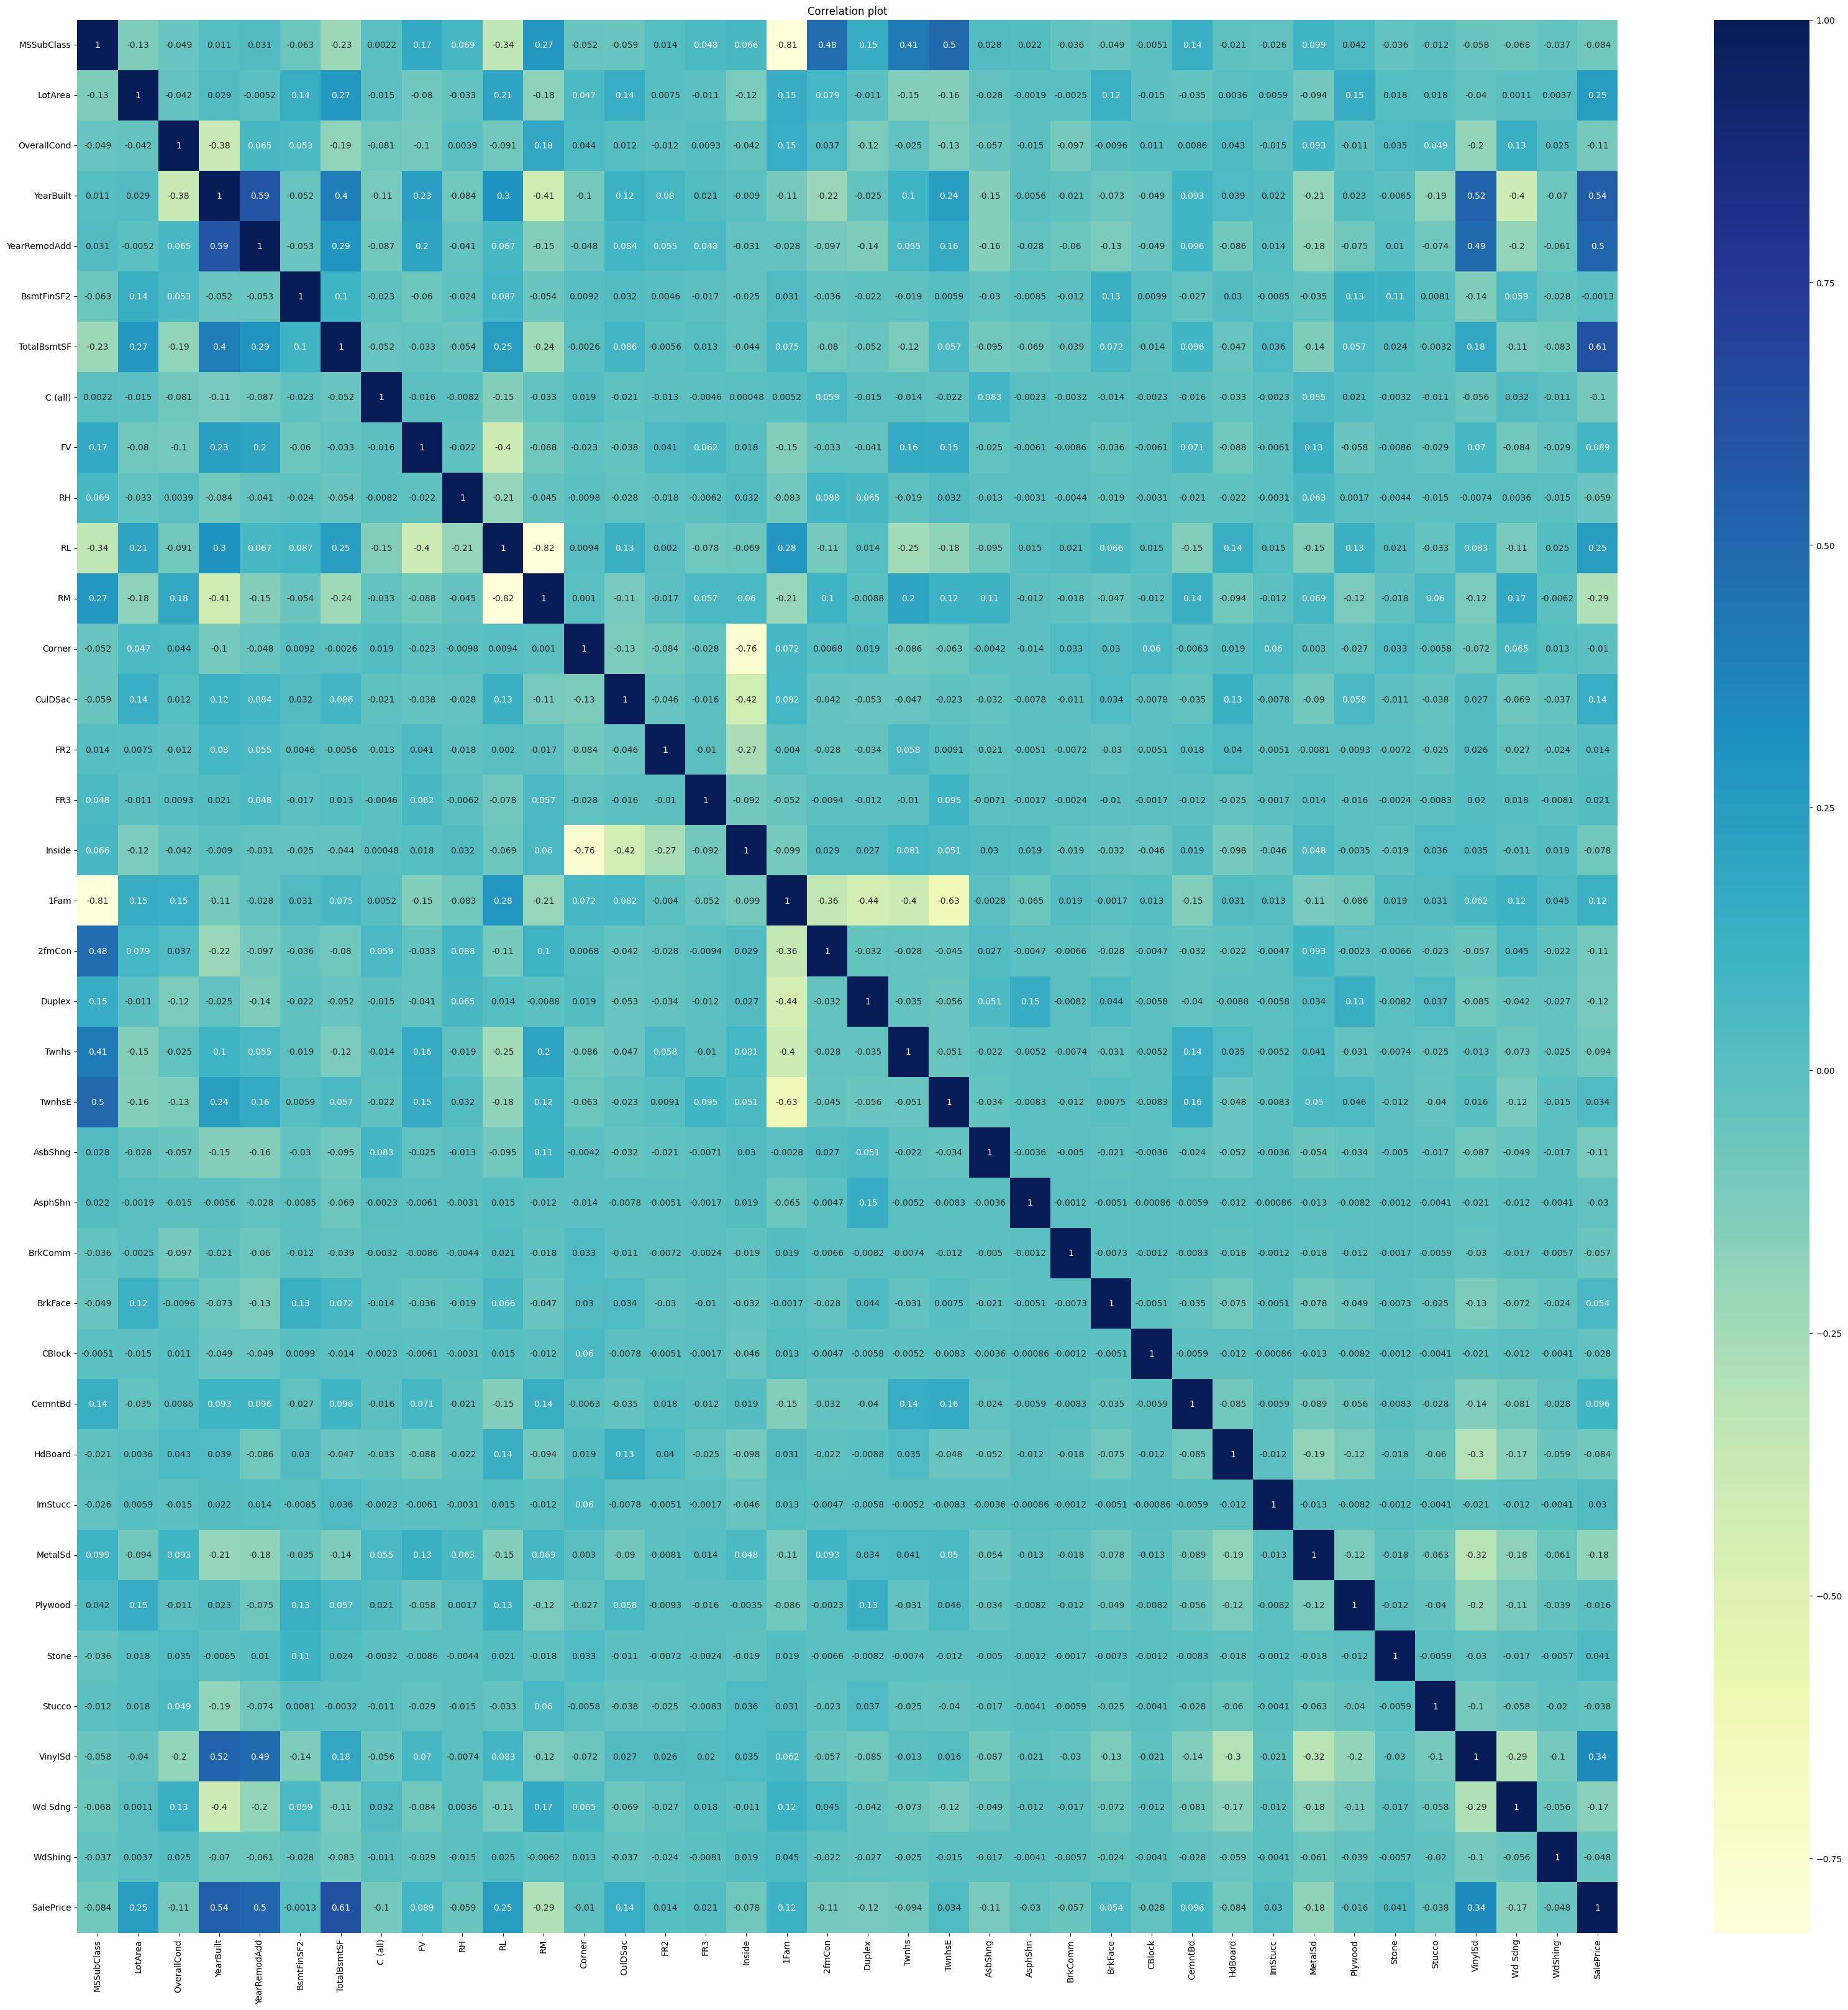

In [13]:
plt.figure(figsize=(40,40))
sns.heatmap(train.corr(),cmap="YlGnBu",annot=True)
plt.title("Correlation plot")
plt.show()

<Axes: xlabel='TotalBsmtSF', ylabel='OverallCond'>

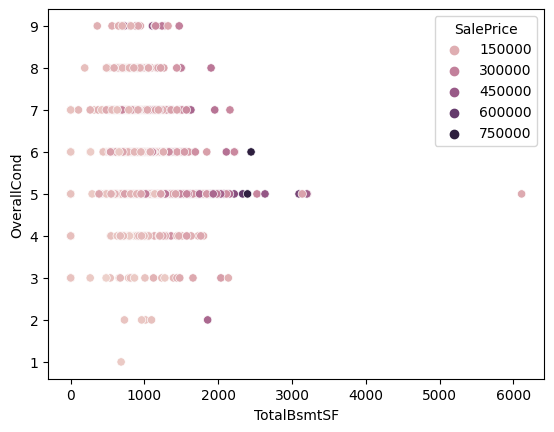

In [14]:
sns.scatterplot(y="OverallCond",x="TotalBsmtSF",hue="SalePrice",data=df)

In [15]:
X_train,y_train=train.drop(["SalePrice"],axis=1),train["SalePrice"]
X_test,y_test=test.drop(["SalePrice"],axis=1),test["SalePrice"]

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.6534045235013047

In [18]:
y_pred_lr=lr_model.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_percentage_error

In [20]:
print("mean_absolute_percentage_error: ",mean_absolute_percentage_error(y_pred_lr,y_test))

mean_absolute_percentage_error:  0.1829336617905579


In [21]:
print("prediction: ", y_pred_lr[:5])
print("actual: ",y_test[:5])

prediction:  [124668.96954462 224134.37650715 190693.01652827 229665.374333
 206871.78404299]
actual:  1436    120500.0
57      196500.0
780     176000.0
382     213500.0
1170    171000.0
Name: SalePrice, dtype: float64


###NUERAL NETWORK LINEAR REGRESSION

In [22]:
import tensorflow as tf

In [23]:
def plot_history(history):
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
  ax1.plot(history.history["loss"])
  ax1.plot(history.history["val_loss"])
  ax1.set_xlabel("epochs")
  ax1.set_ylabel("loss")
  ax1.legend(["loss","val_loss"])
  ax1.grid(True)

  ax2.plot(history.history["mae"])
  ax2.plot(history.history["val_mae"])
  ax2.set_xlabel("epochs")
  ax2.set_ylabel("MAE")
  ax2.legend(["mae","val_mae"])
  ax2.grid(True)

  plt.show()

In [24]:
def train_model(X_train,y_train,num_nodes,lr,drop_prob,epochs,batch_size):
  nn_model=tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation='relu'),
      tf.keras.layers.Dropout(drop_prob),
      tf.keras.layers.Dense(num_nodes,activation='relu'),
      tf.keras.layers.Dropout(drop_prob),
      tf.keras.layers.Dense(1,activation='linear')
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='mean_squared_error',metrics=['mae'])
  history=nn_model.fit(X_train,y_train,epochs,batch_size,validation_split=0.2,verbose=0)

  return nn_model,history

In [25]:
epochs=100
for num_nodes in [32,54,128]:
  for lr in [0.1,0.05,0.001]:
    for drop_prob in [0,0.1]:
      for batch_size in [32,64]:
        print(f"num_nodes: {num_nodes}, lr: {lr}, drop_prob: {drop_prob}, batch_size: {batch_size}")
        model,history=train_model(X_train,y_train,num_nodes,lr,drop_prob,epochs,batch_size)
        plot_history(history)

num_nodes: 32, lr: 0.1, drop_prob: 0, batch_size: 32


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [26]:
model.evaluate(X_test,y_test)

NameError: name 'model' is not defined

In [ ]:
y_pred_nn=model.predict(X_test)

In [ ]:
print("mean_absolute_percentage_error: ",mean_absolute_percentage_error(y_pred_nn,y_test))

In [ ]:
print("prediction: ", y_pred_nn[:5])
print("actual: ",y_test[:5])

In [ ]:
plt.style.use('dark_background')
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.plot(y_test,y_pred_nn,'m--',color="blue",alpha=0.8)
plt.plot(y_test,y_pred_lr,'m--',color="yellow",alpha=0.5)
plt.legend(["nn_model","lr_model"])
plt.show()